# **1. Data Issues - Data Cleaning**

## 1.1 Import pandas, numpy, scipy and read both datasets

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataMax = pd.read_csv("/content/Dataset Generation (Max) (Responses) - Form Responses 1.csv")
dataFardina = pd.read_csv("/content/Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")

## 1.2 Clean Max's Dataset

I will start by looking at missing data and incorrect data in order to merge both databases and have one unique "clean" database.

### **DATA ISSUE 1:** Clear the responses that are empty and delete them.

Why? Because they do not contribute any meaningful information to my analysis. It doesn't matter what type of question I am going to try to answer or what variables will be involved in responding them but empty rows will be completely useless.

Removing these empty rows forms part of the data cleaning process and removing irrelevant data from the dataset.

In [3]:
dataMax = dataMax[(dataMax['Timestamp'] != "8/15/2023 16:21:17") & (dataMax['Timestamp'] != "10/19/2023 11:52:10")]

###**DATA ISSUE 2:** Eliminate row with student that is 50+ years old and is not a Freshman/sophomore/Junior/Senior.

Why? Because, as before, since it did not answer any questions, his information is irrelevant to this analysis. Also, if we wanted to check the distribution of age of students, +50 would likely be an outlier, which would negatively affect statistical data and misrepresent the population of the student's actual mean.


*   Check column "What year are you



In [4]:
# What year are you?
dataMax['What year are you?']
nan_count = dataMax['What year are you?'].isna().sum()
print(nan_count)

0


In [5]:
dataMax[(dataMax['What year are you?'] == "Other") & (dataMax['How old are you?'] == "50+")]
dataMax = dataMax.drop(85)

Why? Irrelevant information.

In [6]:
dataMax.loc[dataMax["My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?"].isnull(), "My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?"]
dataMax = dataMax.drop(63)

###**DATA ISSUE 3**: Missing random data. Filling missing values.


Using mode imputation.

The mode is: 21


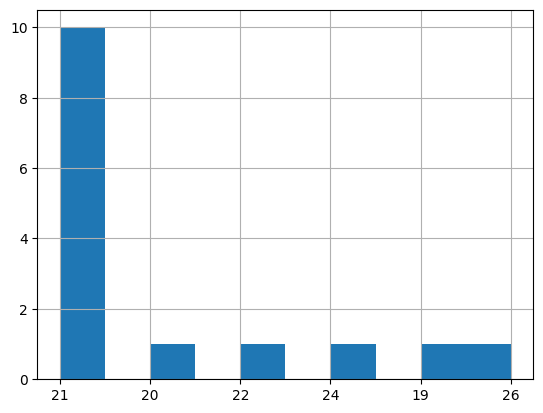

In [7]:
dataMax[dataMax['What year are you?'] == "Senior"]['How old are you?'].hist()
mode_age_senior = dataMax[dataMax['What year are you?'] == "Senior"]['How old are you?'].mode().iloc[0]
print("The mode is: {}".format(mode_age_senior))

In [8]:
# How old are you?
dataMax['How old are you?']
nan_count = dataMax['How old are you?'].isna().sum()
print(nan_count)

1


In [9]:
dataMax.loc[(dataMax['What year are you?'] == "Senior") & (dataMax['How old are you?'].isnull()), 'How old are you?'] = 21

In [10]:
# Timestamp
dataMax['Timestamp']
nan_count = dataMax['Timestamp'].isna().sum()
print(nan_count)

0


In [11]:
# What year are you?
dataMax['What year are you?']
nan_count = dataMax['What year are you?'].isna().sum()
print(nan_count)

0


In [12]:
# How old are you?
dataMax['How old are you?']
nan_count = dataMax['How old are you?'].isna().sum()
print(nan_count)

0


In [13]:
# You could describe the adults you grew up with as...
dataMax['You could describe the adults you grew up with as...']
nan_count = dataMax['You could describe the adults you grew up with as...'].isna().sum()
print(nan_count)

0


In [14]:
# You could describe yourself as...
dataMax['You could describe yourself as...']
nan_count = dataMax['You could describe yourself as...'].isna().sum()
print(nan_count)

0


In [15]:
# How would you rate your religiousness / spirituality?
dataMax['How would you rate your religiousness / spirituality?']
nan_count = dataMax['How would you rate your religiousness / spirituality?'].isna().sum()
print(nan_count)

0


In [16]:
# What bests represents your gender?
dataMax['What bests represents your gender?']
nan_count = dataMax['What bests represents your gender?'].isna().sum()
print(nan_count)

0


In [17]:
# My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
dataMax["My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?"]
nan_count = dataMax["My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?"].isna().sum()
print(nan_count)

0


In [18]:
# My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
dataMax["My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?"]
nan_count = dataMax["My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?"].isna().sum()
print(nan_count)

0


In [19]:
# I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?
dataMax["I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?"]
nan_count = dataMax["I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?"].isna().sum()
print(nan_count)

1


In [20]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.loc[dataMax["I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?"].isnull(), "I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?, dtype: object


In [21]:
# My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.
dataMax["My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."]
nan_count = dataMax["My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."].isna().sum()
print(nan_count)

3


In [22]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Neutral") & (dataMax["How would you rate your religiousness / spirituality?"] == "Strongly spiritual")]["My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."].mode()
print(mode_for_current_question)
dataMax.at[7, "My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."] = "Strongly a jerk"

0    Strongly a jerk
Name: My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well., dtype: object


In [23]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly conservative") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."].mode()
print(mode_for_current_question)
dataMax.at[50, "My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."] = "Not a jerk"

0    Not a jerk
Name: My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well., dtype: object


In [24]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."].mode()
print(mode_for_current_question)
dataMax.at[94, "My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."] = "Not a jerk"

0    Not a jerk
Name: My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well., dtype: object


In [25]:
# I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?
dataMax["I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?"]
nan_count = dataMax["I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?"].isna().sum()
print(nan_count)

1


In [26]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?, dtype: object


In [27]:
# My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?
dataMax["My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?"]
nan_count = dataMax["My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?"].isna().sum()
print(nan_count)

1


In [28]:
mode_for_current_question = dataMax[(dataMax["You could describe the adults you grew up with as..."] == "Mildly liberal") & (dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?, dtype: object


In [29]:
# 'My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says "nephew loves you so much" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?'
dataMax["My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"]
nan_count = dataMax["My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"].isna().sum()
print(nan_count)

2


In [30]:
mode_for_current_question = dataMax[(dataMax["You could describe the adults you grew up with as..."] == "Mildly liberal") & (dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"] = "Strongly a jerk"

0    Strongly a jerk
Name: My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says "nephew loves you so much" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?, dtype: object


In [31]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Neutral") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[77, "My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"] = "Mildly a jerk"

0    Mildly a jerk
Name: My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says "nephew loves you so much" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?, dtype: object


In [32]:
# I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?
dataMax["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"]
nan_count = dataMax["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"].isna().sum()
print(nan_count)

3


In [33]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?, dtype: object


In [34]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Neutral") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[77, "I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?, dtype: object


In [35]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Strongly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[88, "I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?, dtype: object


In [36]:
# I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?
dataMax["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"]
nan_count = dataMax["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"].isna().sum()
print(nan_count)

3


In [37]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[12, "I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?, dtype: object


In [38]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly conservative") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[50, "I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?, dtype: object


In [39]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?, dtype: object


In [40]:
# One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?
dataMax["One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?"]
nan_count = dataMax["One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?"].isna().sum()
print(nan_count)

1


In [41]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?"] = "Mildly a jerk"

0    Mildly a jerk
Name: One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?, dtype: object


In [42]:
# I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?
dataMax["I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"]
nan_count = dataMax["I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"].isna().sum()
print(nan_count)

3


In [43]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly conservative") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[50, "I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?, dtype: object


In [44]:
mode_for_current_question = dataMax[(dataMax["You could describe the adults you grew up with as..."] == "Mildly liberal") & (dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?, dtype: object


In [45]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[92, "I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?, dtype: object


In [46]:
# '\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?'
dataMax["\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"]
nan_count = dataMax["\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"].isna().sum()
print(nan_count)

3


In [47]:
mode_for_current_question = dataMax[(dataMax["What bests represents your gender?"] == "Male") & (dataMax["You could describe the adults you grew up with as..."] == "Don't know / It's complicated") & (dataMax["You could describe yourself as..."] == "Don't know / It's complicated") & (dataMax["How would you rate your religiousness / spirituality?"] == "Strongly spiritual")]["\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[23, "\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"] = "Mildly a jerk"

0    Mildly a jerk
Name: \nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?, dtype: object


In [48]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Strongly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[43, "\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"] = "Not a jerk"

0    Not a jerk
Name: \nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?, dtype: object


In [49]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"] = "Not a jerk"

0    Not a jerk
Name: \nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?, dtype: object


In [50]:
# My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?
dataMax["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"]
nan_count = dataMax["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"].isna().sum()
print(nan_count)

1


In [51]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"] = "Mildly a jerk"

0    Mildly a jerk
Name: My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?, dtype: object


In [52]:
# My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?
dataMax["My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?"]
nan_count = dataMax["My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?"].isna().sum()
print(nan_count)

2


In [53]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly conservative") & (dataMax["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[50, "My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?"] = "Mildly a jerk"

0    Mildly a jerk
Name: My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?, dtype: object


In [54]:
mode_for_current_question = dataMax[(dataMax["You could describe yourself as..."] == "Mildly liberal") & (dataMax["How would you rate your religiousness / spirituality?"] == "Somewhat spiritual")]["My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?"].mode()
print(mode_for_current_question)
dataMax.at[56, "My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?"] = "Strongly a jerk"

0    Strongly a jerk
Name: My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?, dtype: object


###**DATA ISSUE 4**: Convert the column representing the age from type object to type float64

In [55]:
print(dataMax['How old are you?'].dtypes)

object


In [56]:
dataMax['How old are you?'] = dataMax['How old are you?'].astype(float)

## 1.3 Clean Fardina's Dataset

###**DATA ISSUE 1:** Delete student that didnt reply to any of the answers.

In [57]:
dataFardina[(dataFardina['Timestamp'] == "10/19/2023 20:31:30")]
dataFardina = dataFardina.drop(136)

In [58]:
dataFardina[dataFardina["My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"].isnull()]
dataFardina = dataFardina.drop(79)
dataFardina = dataFardina.drop(95)

###**DATA ISSUE 3:** Imputation

In [59]:
# What year are you?
dataFardina['What year are you?']
nan_count = dataFardina['What year are you?'].isna().sum()
print(nan_count)

0


In [60]:
# How old are you?
dataFardina['How old are you?']
nan_count = dataFardina['How old are you?'].isna().sum()
print(nan_count)

0


In [61]:
# You could describe the adults you grew up with as...
dataFardina['You could describe the adults you grew up with as...']
nan_count = dataFardina['You could describe the adults you grew up with as...'].isna().sum()
print(nan_count)

0


In [62]:
# I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?
dataFardina["I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?"]
nan_count = dataFardina["I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?"].isna().sum()
print(nan_count)

1


In [63]:
mode_for_current_question = dataFardina[(dataFardina["You could describe yourself as..."] == "Strongly liberal") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?"].mode()
print(mode_for_current_question)
dataFardina.at[4, "I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?"] = "Mildly a jerk"

0    Mildly a jerk
Name: I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?, dtype: object


In [64]:
# My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.
dataFardina["My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."]
nan_count = dataFardina["My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."].isna().sum()
print(nan_count)

1


In [65]:
mode_for_current_question = dataFardina[(dataFardina["You could describe the adults you grew up with as..."] == "Mildly liberal") & (dataFardina["You could describe yourself as..."] == "Strongly liberal") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."].mode()
print(mode_for_current_question)
dataFardina.at[4, "My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well."] = "Mildly a jerk"

0    Mildly a jerk
Name: My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well., dtype: object


In [66]:
# I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?
dataFardina["I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?"]
nan_count = dataFardina["I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?"].isna().sum()
print(nan_count)

0


In [67]:
# My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?
dataFardina["My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?"]
nan_count = dataFardina["My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?"].isna().sum()
print(nan_count)

0


In [68]:
# My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says "nephew loves you so much" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?
dataFardina["My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"]
nan_count = dataFardina["My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"].isna().sum()
print(nan_count)

0


In [69]:
# I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?
dataFardina["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"]
nan_count = dataFardina["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"].isna().sum()
print(nan_count)

1


In [70]:
mode_for_current_question = dataFardina[(dataFardina["You could describe yourself as..."] == "Strongly liberal") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"].mode()
print(mode_for_current_question)
dataFardina.at[4, "I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?, dtype: object


In [71]:
# I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?
dataFardina["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"]
nan_count = dataFardina["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"].isna().sum()
print(nan_count)

2


In [72]:
mode_for_current_question = dataFardina[(dataFardina["You could describe yourself as..."] == "Strongly liberal") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"].mode()
print(mode_for_current_question)
dataFardina.at[4, "I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"] = "Mildly a jerk"

0    Mildly a jerk
Name: I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?, dtype: object


In [73]:
mode_for_current_question = dataFardina[(dataFardina["Would you describe yourself as compassionate?"] == "Yes") & (dataFardina["You could describe yourself as..."] == "Mildly liberal") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"].mode()
print(mode_for_current_question)
dataFardina.at[124, "I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?, dtype: object


In [74]:
# I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?
dataFardina["I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"]
nan_count = dataFardina["I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"].isna().sum()
print(nan_count)

1


In [75]:
mode_for_current_question = dataFardina[(dataFardina["Would you describe yourself as compassionate?"] == "Yes") & (dataFardina["You could describe yourself as..."] == "Mildly conservative") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"].mode()
print(mode_for_current_question)
dataFardina.at[87, "I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?"] = "Not a jerk"

0    Not a jerk
Name: I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?, dtype: object


In [76]:
# Some of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?
dataFardina["\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"]
nan_count = dataFardina["\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"].isna().sum()
print(nan_count)

1


In [77]:
mode_for_current_question = dataFardina[(dataFardina["Would you describe yourself as compassionate?"] == "Yes") & (dataFardina["You could describe yourself as..."] == "Strongly liberal") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"].mode()
print(mode_for_current_question)
dataFardina.at[4, "\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"] = "Not a jerk"

0    Not a jerk
Name: \nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?, dtype: object


In [78]:
# My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?
dataFardina["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?"]
nan_count = dataFardina["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?"].isna().sum()
print(nan_count)

3


In [79]:
mode_for_current_question = dataFardina[(dataFardina["Would you describe yourself as compassionate?"] == "Yes") & (dataFardina["You could describe yourself as..."] == "Strongly liberal") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?"].mode()
print(mode_for_current_question)
dataFardina.at[4, "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?"] = "Strongly a jerk"

0    Strongly a jerk
Name: My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?, dtype: object


In [80]:
mode_for_current_question = dataFardina[(dataFardina["Would you describe yourself as compassionate?"] == "No") & (dataFardina["You could describe yourself as..."] == "Mildly liberal") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Not spiritual at all")]["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?"].mode()
print(mode_for_current_question)
dataFardina.at[6, "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?"] = "Mildly a jerk"

0    Mildly a jerk
Name: My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?, dtype: object


In [81]:
mode_for_current_question = dataFardina[(dataFardina["Would you describe yourself as compassionate?"] == "Yes") & (dataFardina["You could describe yourself as..."] == "Mildly liberal") & (dataFardina["How would you rate your religiousness / spirituality?"] == "Strongly spiritual")]["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?"].mode()
print(mode_for_current_question)
dataFardina.at[18, "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?"] = "Strongly a jerk"

0    Strongly a jerk
Name: My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?, dtype: object


In [82]:
# My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?
dataFardina["My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?"]
nan_count = dataFardina["My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?"].isna().sum()
print(nan_count)

0


###**DATA ISSUE 5:** Change name of column from "... Am I jerk?" to "... Am I a jerk?"

In [83]:
dataFardina = dataFardina.rename(columns={"My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?": "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"})

## 1.4 Merge Datasets

Merge both datasets so we have one complete dataset with everything.

In [84]:
dataMerged = pd.concat([dataMax, dataFardina], ignore_index=True)

In [85]:
i = 0
for col in dataMerged.columns:
    num_nan = dataMerged[col].isna().sum()
    print(f"Column {i} has {num_nan} NaN values.")
    i += 1

Column 0 has 0 NaN values.
Column 1 has 0 NaN values.
Column 2 has 0 NaN values.
Column 3 has 0 NaN values.
Column 4 has 0 NaN values.
Column 5 has 0 NaN values.
Column 6 has 0 NaN values.
Column 7 has 0 NaN values.
Column 8 has 0 NaN values.
Column 9 has 0 NaN values.
Column 10 has 0 NaN values.
Column 11 has 0 NaN values.
Column 12 has 0 NaN values.
Column 13 has 0 NaN values.
Column 14 has 0 NaN values.
Column 15 has 0 NaN values.
Column 16 has 0 NaN values.
Column 17 has 0 NaN values.
Column 18 has 0 NaN values.
Column 19 has 0 NaN values.
Column 20 has 0 NaN values.
Column 21 has 93 NaN values.


# **2. My Questions**


1. "Is there a relationship between holding extreme opposite political views (strongly liberal or strongly conservative) and the likelihood of answering 'Strongly a jerk', 'Mildly a jerk', or 'Not a jerk'?"

2. "Do the students of CMSC320 show differences in aligning with their parents' political views when their parents hold strongly liberal or strongly conservative positions?"


3. ”Did the priming question cause a statistically significant difference in answers between the two sections."


## **QUESTION 1**

---




**"Is there a relationship between holding extreme opposite political views (strongly liberal or strongly conservative) and the likelihood of answering 'Strongly a jerk', 'Mildly a jerk', or 'Not a jerk'?"**

Add three new columns:
- 1. Number of times current student said: Strongly a jerk
- 2. Number of times current student said: Mildly a jerk
- 3. Number of times current student said: Not a jerk

In [86]:
# Number of times current student said: Strongly a jerk
dataMerged['Strongly a Jerk'] = (dataMerged == 'Strongly a jerk').sum(axis=1)

In [87]:
# Number of times current student said: Mildly a jerk
dataMerged['Mildly a Jerk'] = (dataMerged == 'Mildly a jerk').sum(axis=1)

In [88]:
# Number of times current student said: Not a jerk
dataMerged['Not a Jerk'] = (dataMerged == 'Not a jerk').sum(axis=1)

Create two new datasets:
  - dataSC: Including the columns previously created for only "Strongly Conservative" students
  - dataSL: Including the columns previously created for only "Strongly Liberal" students  

In [89]:
dataSC = dataMerged[dataMerged['You could describe yourself as...'] == "Strongly conservative"]
dataSL = dataMerged[dataMerged['You could describe yourself as...'] == "Strongly liberal"]
columns = ['Strongly a Jerk', 'Mildly a Jerk', 'Not a Jerk']

dataSC = dataSC[columns]
dataSL = dataSL[columns]

- Heatmap comparing percentage of answers in each category for both "Strongly Conservative" and "Strongly Liberal" students

<Axes: title={'center': 'Percentage of answers of Strongly Liberal students'}>

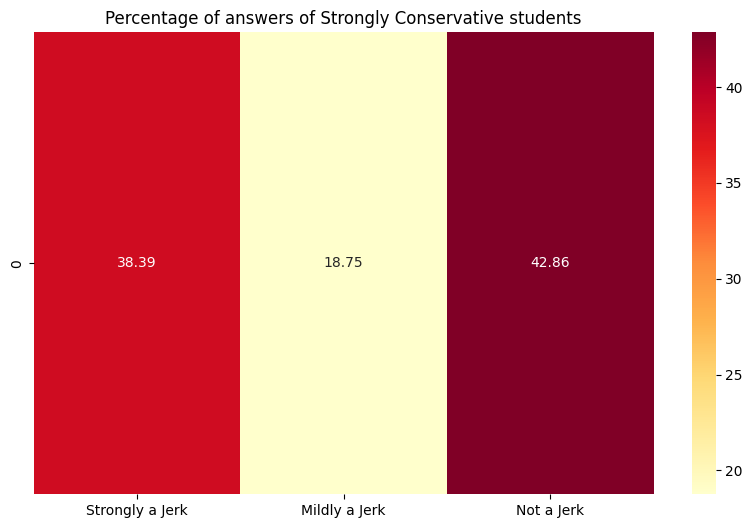

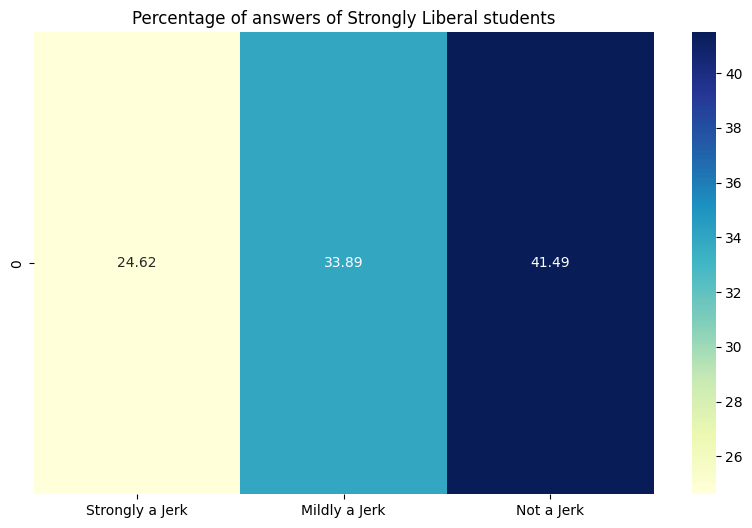

In [90]:
# Heatmap for percentage dataSC (Strongly conservative)
total_per_row_SC = dataSC.sum(axis=1)
dataSC_percentage = (dataSC.divide(total_per_row_SC, axis=0)) * 100
agg_dataSC_percentage = dataSC_percentage.mean().to_frame().T

plt.figure(figsize=(10, 6))
plt.title("Percentage of answers of Strongly Conservative students")
sns.heatmap(agg_dataSC_percentage, cmap='YlOrRd', annot=True, fmt='.2f')

# Heatmap for percentage dataSL (Strongly liberal)
total_per_row_SL = dataSL.sum(axis=1)
dataSL_percentage = (dataSL.divide(total_per_row_SL, axis=0)) * 100
agg_dataSL_percentage = dataSL_percentage.mean().to_frame().T

plt.figure(figsize=(10, 6))
plt.title("Percentage of answers of Strongly Liberal students")
sns.heatmap(agg_dataSL_percentage, cmap='YlGnBu', annot=True, fmt='.2f')


- Radar chart comparing the distribution of answers in each category for both 'Strongly Conservative' and 'Strongly Liberal' students

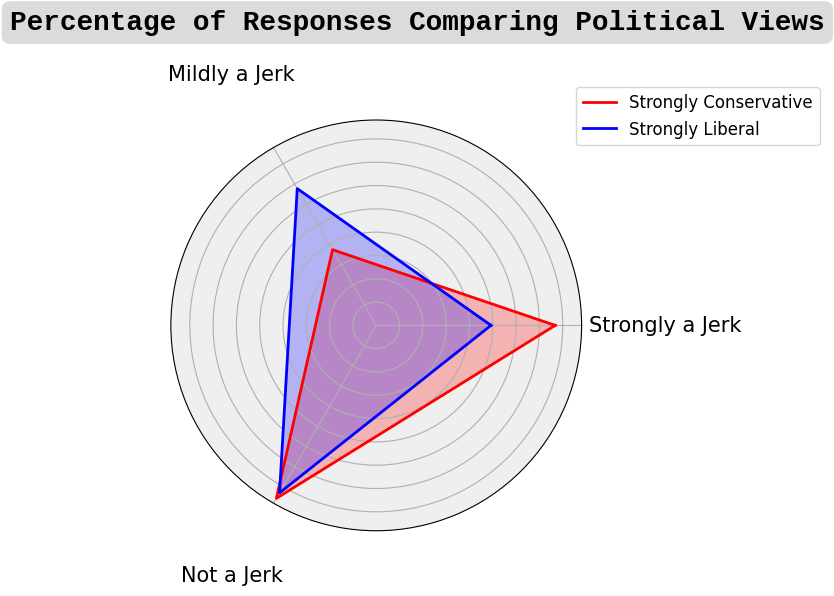

In [91]:
# Font
plt.rcParams['font.family'] = 'Liberation Mono'
from matplotlib.font_manager import FontProperties
plt.rcParams.update(plt.rcParamsDefault)

# Define labels from column names
labels = dataSC.columns.tolist()

# Extract the mean percentages
sc_mean_values = agg_dataSC_percentage.values[0].tolist()
sl_mean_values = agg_dataSL_percentage.values[0].tolist()

# Set data for radar chart
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
sc_mean_values += sc_mean_values[:1]
sl_mean_values += sl_mean_values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot data and fill with color
ax.plot(angles, sc_mean_values, color='red', linewidth=2, linestyle='solid', label='Strongly Conservative')
ax.fill(angles, sc_mean_values, color='red', alpha=0.25)
ax.plot(angles, sl_mean_values, color='blue', linewidth=2, linestyle='solid', label='Strongly Liberal')
ax.fill(angles, sl_mean_values, color='blue', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='#000000', size=15)
ax.set_yticklabels([])
ax.xaxis.set_tick_params(pad=50)  # to increase space for category labels

# color
ax.set_facecolor((0.85, 0.85, 0.85, 0.4))  # light grey with less transparency

# Set the title
title_font = FontProperties(family='Liberation Mono', weight='bold', size=20)

ax.set_title('Percentage of Responses Comparing Political Views',
             color='#000000',
             x=0.6, y=1.2,
             fontproperties=title_font,
             bbox=dict(facecolor='#CDCDCD', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7, lw=10))

# Customize legend
ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.1), fontsize=12)

# Display the radar chart
plt.tight_layout()
plt.show()


##**QUESTION 2**

---


**Do the students of CMSC320 show differences in aligning with their parents' political views when their parents hold strongly liberal or strongly conservative positions?**

Create two new datasets:
  - dataSC - dataset of students whose parents are Strongly Conservative
  - dataSL - dataset of students whose parents are Strongly Liberal   

Add a new column for each called 'Political Difference' that would:

For dataSC:
  - 1 representing that the student is 1 political position/ideology away from their parents (Mildly conservative)     
  - 2 representing that the student is 2 political positions/ideology away from their parents (Neutral)
  - 3 representing that the student is 3 political positions/ideology away from their parents (Mildly liberal)
  - 4 representing that the student is 4 political positions/ideology away from their parents (Strongly liberal)

For dataSL:
  - 1 representing that the student is 1 political position/ideology away from their parents (Mildly liberal)     
  - 2 representing that the student is 2 political positions/ideology away from their parents (Neutral)
  - 3 representing that the student is 3 political positions/ideology away from their parents (Mildly conservative)
  - 4 representing that the student is 4 political positions/ideology away from their parents (Strongly conservative)

In [92]:
dataSC = dataMerged[dataMerged['You could describe the adults you grew up with as...'] == "Strongly conservative"]
dataSL = dataMerged[dataMerged['You could describe the adults you grew up with as...'] == "Strongly liberal"]

dataSC["Political Difference"] = dataSC["You could describe yourself as..."].apply(lambda pv: 0 if pv == "Strongly conservative" else
                                                                                              1 if pv == "Mildly conservative" else
                                                                                              2 if pv == "Neutral" else
                                                                                              3 if pv == "Mildly liberal" else
                                                                                              4 if pv == "Strongly liberal" else None)

dataSL["Political Difference"] = dataSL["You could describe yourself as..."].apply(lambda pv: 0 if pv == "Strongly liberal" else
                                                                                              1 if pv == "Mildly liberal" else
                                                                                              2 if pv == "Neutral" else
                                                                                              3 if pv == "Mildly conservative" else
                                                                                              4 if pv == "Strongly conservative" else None)

dataSC = dataSC[dataSC["Political Difference"].isna() == False]
dataSL = dataSL[dataSL["Political Difference"].isna() == False]

<ipython-input-92-784734d19d5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSC["Political Difference"] = dataSC["You could describe yourself as..."].apply(lambda pv: 0 if pv == "Strongly conservative" else
<ipython-input-92-784734d19d5c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSL["Political Difference"] = dataSL["You could describe yourself as..."].apply(lambda pv: 0 if pv == "Strongly liberal" else


**Distribution of political difference for SC**

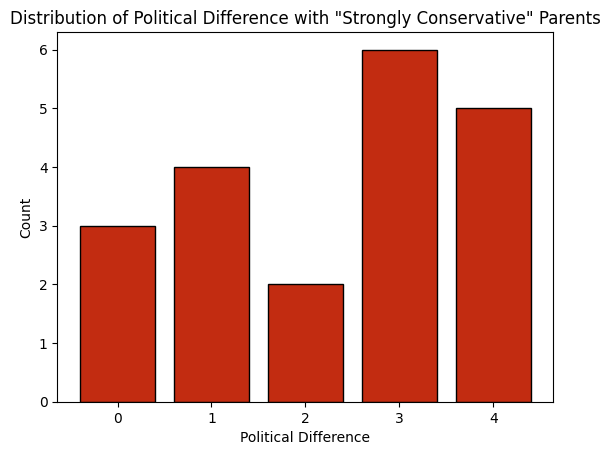

In [93]:
# Count the occurrences of each unique value
value_counts = dataSC['Political Difference'].value_counts().sort_index()
values = value_counts.index.tolist()
counts = value_counts.tolist()

# Bar plot
plt.bar(values, counts, color='#c22c11', edgecolor='black')  # Added edgecolor here
plt.xlabel("Political Difference")
plt.ylabel("Count")
plt.title("Distribution of Political Difference with \"Strongly Conservative\" Parents")
plt.show()

**Distribution of political difference for SC**

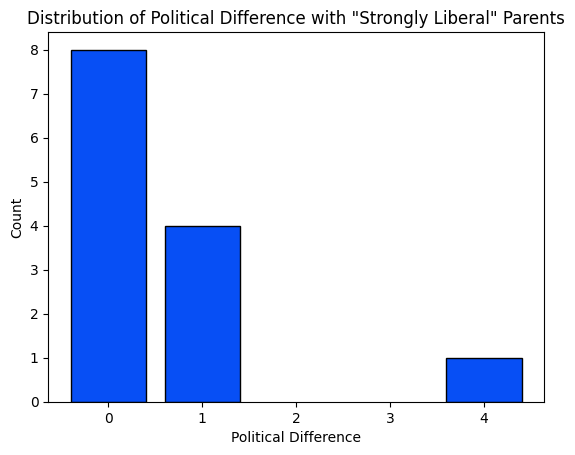

In [94]:
# Count the occurrences
value_counts = dataSL['Political Difference'].value_counts().sort_index()
values = value_counts.index.tolist()
counts = value_counts.tolist()

# Bar plot
plt.bar(values, counts, color='#074ff5', edgecolor='black')  # Added edgecolor here
plt.xlabel("Political Difference")
plt.ylabel("Count")
plt.title("Distribution of Political Difference with \"Strongly Liberal\" Parents")
plt.show()

**MANN-WHITNEY U TEST**

$N_0 = $ The distribution of the "Political Difference" for parents with extreme conservative political views and their sons/daughters is statistically EQUAL to the distribution of the "Political Difference" for parents with extreme liberal political views and their sons/daughters.

$N_A = $ The distribution of the "Political Difference" for parents with extreme conservative political views and their sons/daughters is statistically DIFFERENT from the distribution of the "Political Difference" for parents with extreme liberal political views and their sons/daughters.

In [95]:
stat, p_value = sp.stats.mannwhitneyu(dataSL['Political Difference'], dataSC['Political Difference'])
print("The p-value of the test is: {}\n".format(p_value))

if p_value <= 0.01:
  print("Reject Null hypothesis since p-value <= 0.01: Therefore, the distribution of Political Difference for strongly liberal parents is NOT EQUAL to the distribution of Political Difference for strongly conservative parents.")
else:
  print("Fail to reject the Null hypothesis since p-value > 0.01: Therefore, the distribution of Political Difference for strongly liberal parents is EQUAL to the distribution of Political Difference for strongly conservative parents.")

The p-value of the test is: 0.002331132150955622

Reject Null hypothesis since p-value <= 0.01: Therefore, the distribution of Political Difference for strongly liberal parents is NOT EQUAL to the distribution of Political Difference for strongly conservative parents.


We **REJECT the Null Hypotheis** since the p-value (0.002331132150955622) is less than the alpha used for this test (0.01).

Therefore, we do not have enough evidence to conclude that the distribution of Political Difference for strongly liberal parents is EQUAL to the distribution of Political Difference for strongly conservative parents.

For that reason, we adopt the alternative hypothesis that states that the distribution of Political Difference for strongly liberal parents is NOT EQUAL to the distribution of Political Difference for strongly conservative parents.

In [96]:
print(dataSL['Political Difference'].mean())
print(dataSC['Political Difference'].mean())

0.6153846153846154
2.3


Mean value for SL = 0.6 - Meaning most of students follow the political ideology of their strongly liberal parents.

Mean value for SC = 2.3 - Meaning most of the students DO NOT follow the political ideology of their strongly connservative parents and tend to be more neutral or even they lay in more liberal political position.

##**QUESTION 3**

---


**”Did the priming question cause a statistically significant difference in answers between the two sections."**


Add three new columns for both datasets (Max and Fardina):
- 1. Number of times current student said: Strongly a jerk
- 2. Number of times current student said: Mildly a jerk
- 3. Number of times current student said: Not a jerk

In [97]:
# Number of times current student said: Strongly a jerk
dataMax['Strongly a Jerk'] = (dataMax == 'Strongly a jerk').sum(axis=1)
# Number of times current student said: Mildly a jerk
dataMax['Mildly a Jerk'] = (dataMax == 'Mildly a jerk').sum(axis=1)
# Number of times current student said: Not a jerk
dataMax['Not a Jerk'] = (dataMax == 'Not a jerk').sum(axis=1)

In [98]:
# Number of times current student said: Strongly a jerk
dataFardina['Strongly a Jerk'] = (dataFardina == 'Strongly a jerk').sum(axis=1)
# Number of times current student said: Mildly a jerk
dataFardina['Mildly a Jerk'] = (dataFardina == 'Mildly a jerk').sum(axis=1)
# Number of times current student said: Mildly a jerk
dataFardina['Not a Jerk'] = (dataFardina == 'Not a jerk').sum(axis=1)

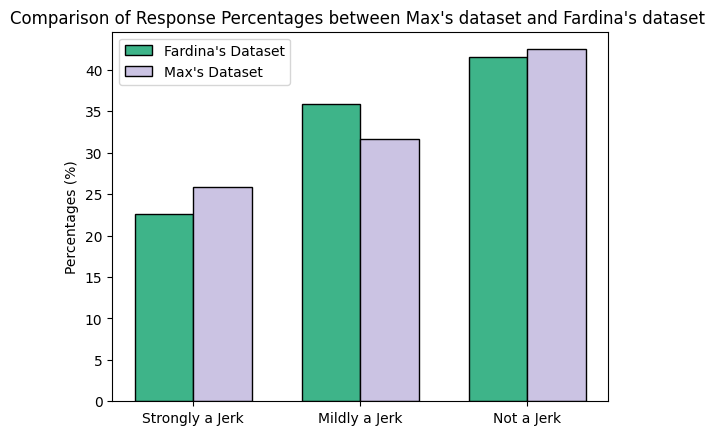

In [99]:
# Calculate the frequency (in percentage) of 'Strongly a Jerk', 'Mildly a Jerk', and 'Not a Jerk' for dataFardina and dataMax
categories = ['Strongly a Jerk', 'Mildly a Jerk', 'Not a Jerk']
counts_fardina = [dataFardina[column].sum() for column in categories]
counts_max = [dataMax[column].sum() for column in categories]
percentages_fardina = [count / sum(counts_fardina) * 100 for count in counts_fardina]
percentages_max = [count / sum(counts_max) * 100 for count in counts_max]

# Bar chart
width = 0.35  # Width of the bars
x = np.arange(len(categories))  # x-axis values
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, percentages_fardina, width, label='Fardina\'s Dataset', color='#3EB489', edgecolor='black')
rects2 = ax.bar(x + width/2, percentages_max, width, label='Max\'s Dataset', color='#CBC3E3', edgecolor='black')
ax.set_ylabel('Percentages (%)')
ax.set_title('Comparison of Response Percentages between Max\'s dataset and Fardina\'s dataset ')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
plt.show()

Check distribution for each:
- Strongly a Jerk
- Mildly a Jerk
- Not a Jerk

****

**Strongly a Jerk**

$N_0 = $ The mean of answers responded "Strongly a Jerk" of the students in Max's dataset is **EQUAL** to the mean of answers responded "Strongly a Jerk" of the students in Fardian's dataset.

$N_A = $ The mean of answers responded "Strongly a Jerk" of the students in Max's dataset is **NOT EQUAL** to the mean of answers responded "Strongly a Jerk" of the students in Fardian's dataset.

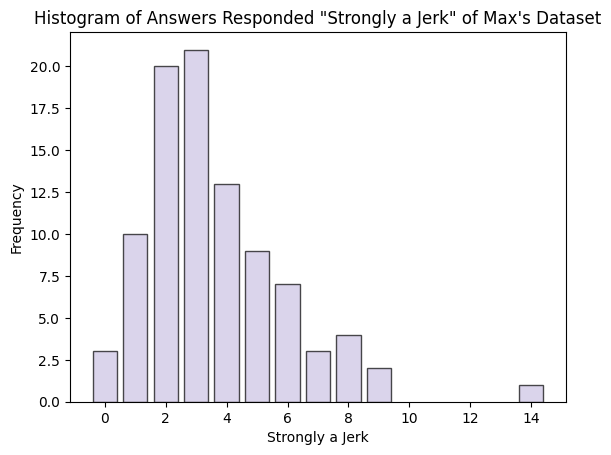

In [100]:
# Count the occurrences
value_counts = dataMax['Strongly a Jerk'].value_counts().sort_index()
values = value_counts.index.tolist()
counts = value_counts.tolist()

# Create a bar plot
plt.bar(values, counts, color='#CBC3E3', edgecolor='black', alpha=0.7)
plt.xlabel("Strongly a Jerk")
plt.ylabel("Frequency")
plt.title("Histogram of Answers Responded \"Strongly a Jerk\" of Max's Dataset")
plt.show()

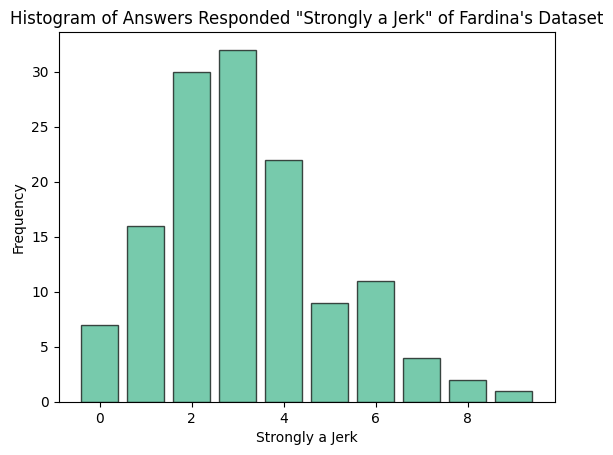

In [101]:
# Count the occurrences
value_counts = dataFardina['Strongly a Jerk'].value_counts().sort_index()
values = value_counts.index.tolist()
counts = value_counts.tolist()

# Create a bar plot
plt.bar(values, counts, color='#3EB489', edgecolor='black', alpha=0.7)
plt.xlabel("Strongly a Jerk")
plt.ylabel("Frequency")
plt.title("Histogram of Answers Responded \"Strongly a Jerk\" of Fardina's Dataset")
plt.show()

Means:

In [102]:
print(dataMax['Strongly a Jerk'].mean())
print(dataFardina['Strongly a Jerk'].mean())

3.6236559139784945
3.1641791044776117


**TWO SAMPLE T-TEST**

In [103]:
t_stat, p_value = sp.stats.ttest_ind(dataFardina['Strongly a Jerk'], dataMax['Strongly a Jerk'])
print("The p-value of the test is: {}\n".format(p_value))

if p_value <= 0.01:
  print("Reject Null hypothesis since {} <= 0.01: Therefore, the mean of answers responded \"Strongly a Jerk\" of the students in Max's dataset is NOT EQUAL to the mean of answers responded \"Strongly a Jerk\" of the students in Fardian's dataset.".format(p_value))
else:
  print("Fail to reject the Null hypothesis since {} > 0.01: Therefore, the mean of answers responded \"Strongly a Jerk\" of the students in Max's dataset is EQUAL to the mean of answers responded \"Strongly a Jerk\" of the students in Fardian's dataset.".format(p_value))

The p-value of the test is: 0.10145783368557042

Fail to reject the Null hypothesis since 0.10145783368557042 > 0.01: Therefore, the mean of answers responded "Strongly a Jerk" of the students in Max's dataset is EQUAL to the mean of answers responded "Strongly a Jerk" of the students in Fardian's dataset.


****

**Mildly a Jerk**

$N_0 = $ The mean of answers responded "Mildly a Jerk" of the students in Max's dataset is **EQUAL** to the mean of answers responded "Mildly a Jerk" of the students in Fardian's dataset.

$N_A = $ The mean of answers responded "Mildly a Jerk" of the students in Max's dataset is **NOT EQUAL** to the mean of answers responded "Mildly a Jerk" of the students in Fardian's dataset.

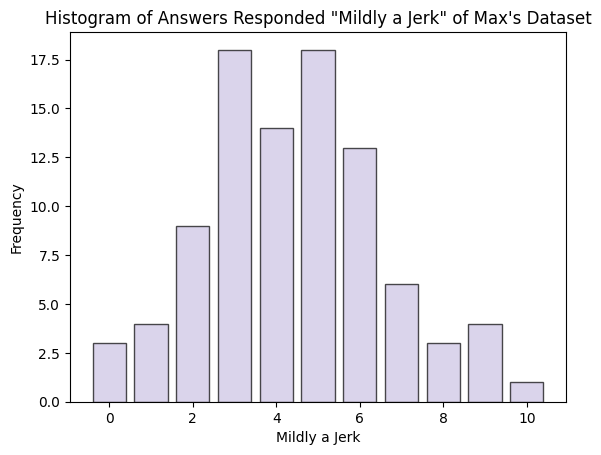

In [104]:
# Count the occurrences
value_counts = dataMax['Mildly a Jerk'].value_counts().sort_index()
values = value_counts.index.tolist()
counts = value_counts.tolist()

# Create a bar plot
plt.bar(values, counts, color='#CBC3E3', edgecolor='black', alpha=0.7)
plt.xlabel("Mildly a Jerk")
plt.ylabel("Frequency")
plt.title("Histogram of Answers Responded \"Mildly a Jerk\" of Max's Dataset")
plt.show()

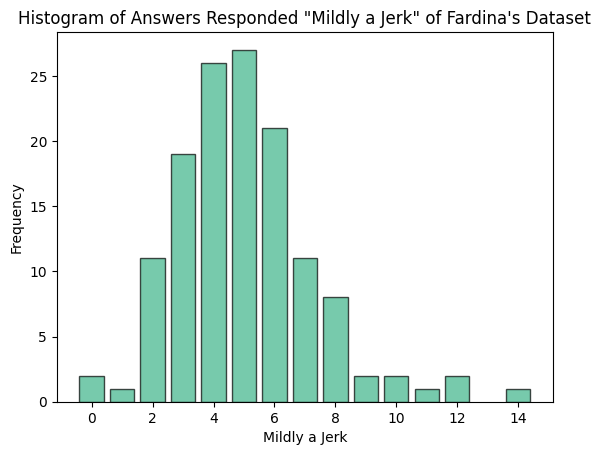

In [105]:
# Count the occurrences
value_counts = dataFardina['Mildly a Jerk'].value_counts().sort_index()
values = value_counts.index.tolist()
counts = value_counts.tolist()

# Create a bar plot
plt.bar(values, counts, color='#3EB489', edgecolor='black', alpha=0.7)
plt.xlabel("Mildly a Jerk")
plt.ylabel("Frequency")
plt.title("Histogram of Answers Responded \"Mildly a Jerk\" of Fardina's Dataset")
plt.show()

Means:

In [106]:
print(dataMax['Mildly a Jerk'].mean())
print(dataFardina['Mildly a Jerk'].mean())

4.43010752688172
5.022388059701493


**TWO SAMPLE T-TEST**

In [107]:
t_stat, p_value = sp.stats.ttest_ind(dataFardina['Mildly a Jerk'], dataMax['Mildly a Jerk'])

print("The p-value of the test is: {}\n".format(p_value))

if p_value <= 0.01:
  print("Reject Null hypothesis since {} <= 0.01: Therefore, the mean of answers responded \"Mildly a Jerk\" of the students in Max's dataset is NOT EQUAL to the mean of answers responded \"Mildly a Jerk\" of the students in Fardian's dataset.".format(p_value))
else:
  print("Fail to reject the Null hypothesis since {} > 0.01: Therefore, the mean of answers responded \"Mildly a Jerk\" of the students in Max's dataset is EQUAL to the mean of answers responded \"Mildly a Jerk\" of the students in Fardian's dataset.".format(p_value))


The p-value of the test is: 0.051412829701015024

Fail to reject the Null hypothesis since 0.051412829701015024 > 0.01: Therefore, the mean of answers responded "Mildly a Jerk" of the students in Max's dataset is EQUAL to the mean of answers responded "Mildly a Jerk" of the students in Fardian's dataset.


****

**Not a Jerk**

$N_0 = $ The mean of answers responded "Not a Jerk" of the students in Max's dataset is **EQUAL** to the mean of answers responded "Not a Jerk" of the students in Fardian's dataset.

$N_A = $ The mean of answers responded "Not a Jerk" of the students in Max's dataset is **NOT EQUAL** to the mean of answers responded "Not a Jerk" of the students in Fardian's dataset.

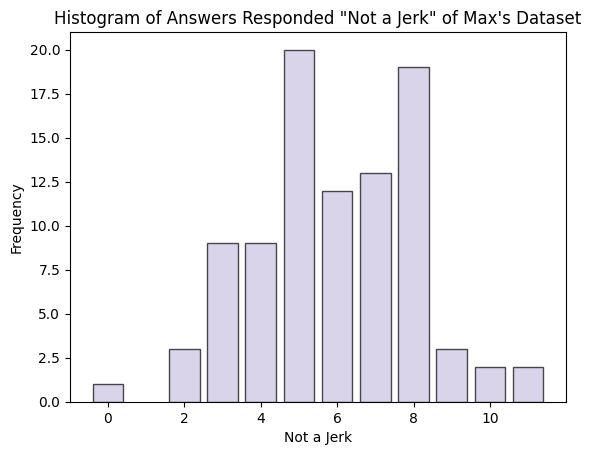

In [108]:
# Count the occurrences
value_counts = dataMax['Not a Jerk'].value_counts().sort_index()
values = value_counts.index.tolist()
counts = value_counts.tolist()

# Create a bar plot
plt.bar(values, counts, color='#CBC3E3', edgecolor='black', alpha=0.7)
plt.xlabel("Not a Jerk")
plt.ylabel("Frequency")
plt.title("Histogram of Answers Responded \"Not a Jerk\" of Max's Dataset")
plt.show()

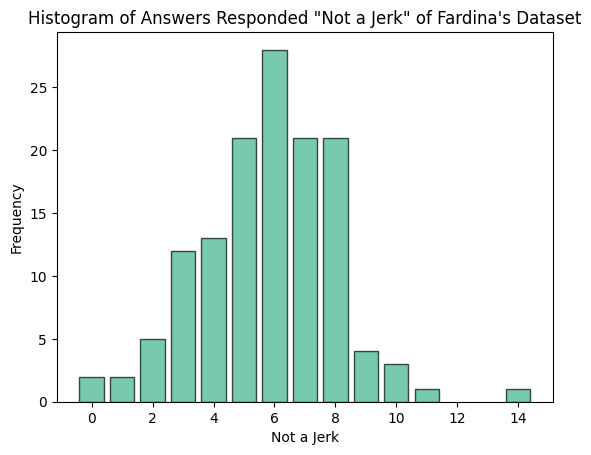

In [109]:
# Count the occurrences
value_counts = dataFardina['Not a Jerk'].value_counts().sort_index()
values = value_counts.index.tolist()
counts = value_counts.tolist()

# Create a bar plot
plt.bar(values, counts, color='#3EB489', edgecolor='black', alpha=0.7)
plt.xlabel("Not a Jerk")
plt.ylabel("Frequency")
plt.title("Histogram of Answers Responded \"Not a Jerk\" of Fardina's Dataset")
plt.show()

Means:

In [110]:
print(dataMax['Not a Jerk'].mean())
print(dataFardina['Not a Jerk'].mean())

5.946236559139785
5.813432835820896


**TWO SAMPLE T-TEST**

In [111]:
t_stat, p_value = sp.stats.ttest_ind(dataFardina['Not a Jerk'], dataMax['Not a Jerk'])

print("The p-value of the test is: {}\n".format(p_value))

if p_value <= 0.01:
  print("Reject Null hypothesis since {} <= 0.01: Therefore, the mean of answers responded \"Not a Jerk\" of the students in Max's dataset is NOT EQUAL to the mean of answers responded \"Not a Jerk\" of the students in Fardian's dataset.".format(p_value))
else:
  print("Fail to reject the Null hypothesis since {} > 0.01: Therefore, the mean of answers responded \"Not a Jerk\" of the students in Max's dataset is EQUAL to the mean of answers responded \"Not a Jerk\" of the students in Fardian's dataset.".format(p_value))


The p-value of the test is: 0.6530301495440829

Fail to reject the Null hypothesis since 0.6530301495440829 > 0.01: Therefore, the mean of answers responded "Not a Jerk" of the students in Max's dataset is EQUAL to the mean of answers responded "Not a Jerk" of the students in Fardian's dataset.
